In [1]:
#importando a biblioteca pandas
import pandas as pd

In [4]:
#utilizando o google colab, nesse comando ele podera puxa o que está no 'google drive'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# colocar o endereço dentro do google drive, o caminho começa depois mydrive
df = pd.read_csv("/content/drive/MyDrive/datasets/Gapminder.csv",error_bad_lines=False, sep=";")

In [7]:
#ver as 5 primeiras linhas
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [10]:
#ver quantidade de linhas (3312) e colunas (6)
df.shape

(3312, 6)

In [11]:
# informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    3312 non-null   object 
 1   continent  3011 non-null   object 
 2   year       3312 non-null   int64  
 3   lifeExp    3312 non-null   float64
 4   pop        3312 non-null   int64  
 5   gdpPercap  3312 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 155.4+ KB


In [12]:
# media de cada campo
df.mean()

year         1.980302e+03
lifeExp      6.524687e+01
pop          3.161489e+07
gdpPercap    1.131712e+04
dtype: float64

In [14]:
# descrive algumas informações estatísticas, como média, desvio padrão, percentil, valores max e min
df.describe()

,year,lifeExp,pop,gdpPercap
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165877
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [15]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [19]:
# famoso missing values , " dados faltantes"
df.isna()

,country,continent,year,lifeExp,pop,gdpPercap
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3307,False,False,False,False,False,False
3308,False,False,False,False,False,False
3309,False,False,False,False,False,False
3310,False,False,False,False,False,False


In [20]:
# conta numero de nulos
df.isna().sum()

country        0
continent    301
year           0
lifeExp        0
pop            0
gdpPercap      0
dtype: int64

In [30]:
# distinct dos continentes
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [32]:
#contar os paises por continente
df.groupby("continent")["country"].nunique()

continent
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: country, dtype: int64

In [35]:
#mostrando os paises com continente nulos
df.loc[df['continent'].isnull()]

,country,continent,year,lifeExp,pop,gdpPercap
60,Armenia,NaN,1992,68.663,3378331,1442.937796
61,Armenia,NaN,1997,70.377,3059000,1791.347190
62,Armenia,NaN,2002,71.403,3013818,2692.304039
63,Armenia,NaN,2007,71.965,2971650,4942.543911
64,Aruba,NaN,1972,70.941,59461,4939.758007
...,...,...,...,...,...,...
3235,Vanuatu,NaN,1987,61.860,142207,3251.274545
3236,Vanuatu,NaN,1992,65.080,161399,3443.424460
3237,Vanuatu,NaN,1997,66.462,179428,3840.467248
3238,Vanuatu,NaN,2002,68.406,196178,3234.458141


In [37]:
# filtrando pais Aruba
df.loc[df['country']=='Aruba']

,country,continent,year,lifeExp,pop,gdpPercap
64,Aruba,NaN,1972,70.941,59461,4939.758007
65,Aruba,NaN,1977,71.830,59412,7390.359942
66,Aruba,NaN,1982,74.116,61569,10874.914950
67,Aruba,NaN,1987,74.494,65415,17674.338900
68,Aruba,NaN,1992,74.108,67174,25120.549610
69,Aruba,NaN,1997,73.011,68341,26483.668620
70,Aruba,NaN,2002,73.451,70441,26467.870620
71,Aruba,NaN,2007,74.239,72194,27230.675210


In [39]:
# media estatistica do Brasil
df.loc[df['country']=='Brazil'].describe()

,year,lifeExp,pop,gdpPercap
count,12.000000,12.000000,1.200000e+01,12.000000
mean,1979.500000,62.239500,1.223121e+08,5829.316653
std,18.027756,7.039314,4.574762e+07,2436.453754
min,1952.000000,50.917000,5.660256e+07,2108.944355
25%,1965.750000,57.140250,8.504721e+07,3406.544718
50%,1979.500000,62.412500,1.216384e+08,6805.200837
75%,1993.250000,67.639750,1.591187e+08,7844.817070
max,2007.000000,72.390000,1.900106e+08,9065.800825


In [41]:
df.loc[df['country']=='Brazil']

,country,continent,year,lifeExp,pop,gdpPercap
375,Brazil,Americas,1952,50.917,56602560,2108.944355
376,Brazil,Americas,1957,53.285,65551171,2487.365989
377,Brazil,Americas,1962,55.665,76039390,3336.585802
378,Brazil,Americas,1967,57.632,88049823,3429.864357
379,Brazil,Americas,1972,59.504,100840058,4985.711467
380,Brazil,Americas,1977,61.489,114313951,6660.118654
381,Brazil,Americas,1982,63.336,128962939,7030.835878
382,Brazil,Americas,1987,65.205,142938076,7807.095818
383,Brazil,Americas,1992,67.057,155975974,6950.283021
384,Brazil,Americas,1997,69.388,168546719,7957.980824


In [44]:
# maior expectativa de vida entre todos os paises
df.loc[df["lifeExp"].max()==df['lifeExp']]

,country,continent,year,lifeExp,pop,gdpPercap
1597,Japan,Asia,2006,82.67,127463611,31001.71797


In [46]:
# as 3 menores populações
df.nsmallest(3, "pop")

,country,continent,year,lifeExp,pop,gdpPercap
65,Aruba,NaN,1977,71.830,59412,7390.359942
64,Aruba,NaN,1972,70.941,59461,4939.758007
2530,Sao Tome and Principe,NaN,1952,46.471,60011,879.583586


In [47]:
# as maiores rendas per capitas
df.nlargest(10, "gdpPercap")

,country,continent,year,lifeExp,pop,gdpPercap
1652,Kuwait,Asia,1957,58.033,212846,113523.13290
1655,Kuwait,Asia,1972,67.712,841934,109347.86700
1651,Kuwait,Asia,1952,55.565,160000,108382.35290
1653,Kuwait,Asia,1962,60.470,358266,95458.11176
2466,Qatar,Asia,2007,75.588,907229,82010.97804
2459,Qatar,Asia,1972,62.061,131794,81068.89506
1654,Kuwait,Asia,1967,64.624,575003,80894.88326
388,Brunei,Asia,1977,69.660,167216,72555.22854
2460,Qatar,Asia,1977,64.956,188947,71615.82982
1820,Luxembourg,Europe,2005,79.570,468571,70014.00000


In [48]:
#maiores populações em 2007
df.loc[df['year']==2007].nlargest(5,'pop')

,country,continent,year,lifeExp,pop,gdpPercap
638,China,Asia,2007,72.961,1318683096,4959.114854
1411,India,Asia,2007,64.698,1110396331,2452.210407
3216,United States,Americas,2007,78.242,301139947,42951.653090
1423,Indonesia,Asia,2007,70.650,223547000,3540.651564
386,Brazil,Americas,2007,72.390,190010647,9065.800825


In [55]:
# crescimento populacional por anos
df.groupby("year")["pop"].sum()

year
1950     810634775
1951     481108384
1952    1851147923
1953    1072294013
1954    1092831439
1955    1112907456
1956    1132393335
1957    2664892549
1958    1206102790
1959    1226014756
1960    1234258085
1961    1234670316
1962    2903948999
1963    1271049765
1964    1294068605
1965    1319736290
1966    1346176481
1967    3229357844
1968    1397354335
1969    1424761918
1970    1453352852
1971    1482973439
1972    3593251642
1973    1731497026
1974    1561447186
1975    1583900596
1976    1604053339
1977    3947998247
1978    1640843062
1979    1659228533
1980    1677312064
1981    1695270397
1982    4309057859
1983     713122644
1984     717767392
1985     722319840
1986     726903924
1987    4713077625
1988     735721883
1989     740666366
1990     960648415
1991    1046587474
1992    5413022014
1993    1058979686
1994    1064239011
1995    1069041130
1996    1073406284
1997    5818820874
1998    1081747310
1999    1085537247
2000    1089093852
2001    1092187462
2002   

In [72]:
df.loc[df['country']=='Brazil'][['year','pop']]

,year,pop
375,1952,56602560
376,1957,65551171
377,1962,76039390
378,1967,88049823
379,1972,100840058
380,1977,114313951
381,1982,128962939
382,1987,142938076
383,1992,155975974
384,1997,168546719


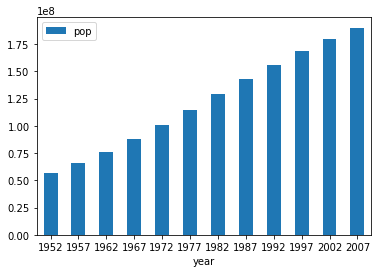

In [73]:
#Gráfico de barras evolução da população do brasil
df.loc[df['country']=='Brazil'][['year','pop']].plot.bar(y='pop',x='year',rot=0);

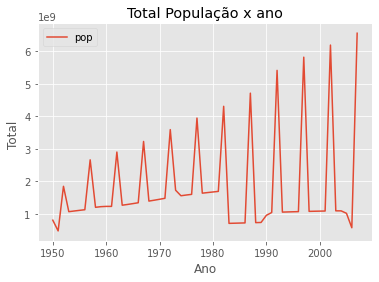

In [102]:
# as maiores rendas per capitas
import matplotlib.pyplot as plt
df.nlargest(10,'pop')[['year','pop']]
#Alterando o estilo
plt.style.use("ggplot")
df.groupby(df["year"])["pop"].sum().plot(title = "Total População x ano")
plt.xlabel("Ano")
plt.ylabel("Total ")
plt.legend();